<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/skillspire_experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this course, we will follow the narrative of a data scientist working at an internet company with 1M daily active users. You will learn how to design experiments and analyze results for various tests, including A/B tests, repeated measures, and tests without a true control group. You will also learn how to effectively communicate your findings to product managers and other stakeholders. The course will be hands-on, with code examples in Python to demonstrate the implementation of experimental designs and data analysis techniques.

# Introduction: The Data Scientist at an Internet Company
## Your role as a data scientist
As a data scientist at a leading internet company, your primary responsibility is to use data-driven insights to help your team make informed decisions. You will work closely with product managers to optimize user experience, drive new user activations, and increase purchases by existing users. Your role will require you to design experiments, analyze results, and effectively communicate your findings.




## Understanding product manager's goals: new user activations and purchases
Product managers are primarily focused on two key performance indicators (KPIs) for the app:

New user activations: The number of new users who sign up and become active on the platform.
Purchases: The total number of purchases made by users, which directly contributes to the company's revenue.
Your goal as a data scientist is to help product managers understand the impact of various features on these KPIs, and provide recommendations based on your findings.

# Introduction to Experimental Design

In this section, we will introduce the concept of experimental design and discuss its importance in data science. We will also cover the basic principles of experimental design, including randomization, blocking, and replication.

## The importance of experimental design in your job
Experimental design is crucial in your role as a data scientist. By designing rigorous experiments, you can reliably assess the impact of new features, identify areas for improvement, and provide data-backed recommendations for the product managers. Effective experimental design allows you to make causal inferences, which means you can confidently determine the cause-and-effect relationship between a change in the app and the observed impact on user behavior.

## Basic principles of experimental design
There are several fundamental principles of experimental design that help ensure the validity and reliability of the results:

Control: Holding all other factors constant to isolate the effect of the treatment or intervention
Randomization: Randomly assigning subjects to treatment groups to minimize selection bias and confounding
Replication: Repeating the experiment multiple times to assess the consistency of the results
By adhering to these principles, we can design experiments that yield accurate, generalizable, and actionable insights.

## Randomization, blocking, and replication
These three key techniques help improve the quality of experimental design:

Randomization: Random assignment of subjects to treatment groups ensures that any differences in outcomes can be attributed to the treatment rather than other factors. Randomization reduces selection bias and confounding, making it easier to draw valid conclusions from the data.

Blocking: Blocking involves grouping subjects with similar characteristics and randomly assigning treatments within these groups. This technique helps control for known sources of variability and increases the precision of the experiment.

Replication: Replication refers to the repetition of an experiment under the same conditions. By replicating experiments, we can assess the consistency of the results and estimate the experimental error. Replication also helps improve the statistical power of the experiment, increasing the likelihood of detecting true effects.

## Types of tests: A/B tests, repeated measures, and tests without a control group
In this course, you will learn how to design and analyze the following types of tests:

A/B tests: These tests involve splitting users into two or more groups and exposing each group to a different version of the app. A/B tests allow you to compare the performance of different features and make data-driven decisions.
Repeated measures: In these tests, you will follow individual users over time and observe how their behavior changes in response to new features or modifications. Repeated measures provide insights into user behavior and help you identify patterns and trends.
Tests without a true control group: In some situations, you may not have access to a true control group. In such cases, you will learn how to use alternative experimental designs like quasi-experiments, interrupted time series, and difference-in-differences to estimate the causal effect of a feature or intervention.
In the following sections, we will dive deeper into each of these test types, exploring how to design, implement, and analyze them to make informed decisions about your app.

# Designing A/B Tests for Feature Evaluation
## What is A/B testing and why it's important
A/B testing, also known as split testing or bucket testing, is a popular method for comparing the performance of two or more versions of a product, feature, or design. In the context of your app, A/B testing allows you to evaluate the impact of new features on user activations and purchases by randomly assigning users to different versions of the app and measuring their behavior. A well-designed A/B test can provide robust evidence of the cause-and-effect relationship between a feature change and its impact on user behavior.

## Identifying key metrics: new user activations and purchases
For an A/B test, it's crucial to identify the key metrics that you want to optimize. In this case, the product managers are primarily concerned with:

New user activations: The number of new users who sign up and become active on the platform.
Purchases: The total number of purchases made by users, which directly contributes to the company's revenue.
These metrics will serve as the basis for evaluating the performance of different features in your A/B tests.

## Random assignment and sample size considerations
In an A/B test, it's important to randomly assign users to different versions of the app (e.g., version A and version B). Random assignment helps ensure that any differences in user behavior between the groups can be attributed to the feature being tested, rather than other factors.

Sample size is another important consideration in A/B testing. The larger your sample size, the more confident you can be in your results. Conducting a power analysis before running the test can help you determine the optimal sample size to detect a meaningful effect with a given level of statistical power.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

np.random.seed(42)

# Generate a dataset with a confounding variable
n_users = 1000
age = np.random.randint(18, 65, n_users)
time_spent = np.random.normal(30, 10, n_users) + (age / 65) * 50  # Time spent on the app (minutes)
version_A = age <= 40
version_B = ~version_A

# Calculate average time spent for each version
mean_time_spent_A = np.mean(time_spent[version_A])
mean_time_spent_B = np.mean(time_spent[version_B])

# Perform t-test without randomization
t_stat_no_random, p_value_no_random = ttest_ind(time_spent[version_A], time_spent[version_B])

# Randomly assign users to groups
random_assignment = np.random.permutation(n_users)
random_version_A = random_assignment[: n_users // 2]
random_version_B = random_assignment[n_users // 2:]

# Calculate average time spent for each randomized version
mean_time_spent_random_A = np.mean(time_spent[random_version_A])
mean_time_spent_random_B = np.mean(time_spent[random_version_B])

# Perform t-test with randomization
t_stat_random, p_value_random = ttest_ind(time_spent[random_version_A], time_spent[random_version_B])

# Print results
print("Without randomization:")
print(f"  Mean time spent (version A): {mean_time_spent_A:.2f} minutes")
print(f"  Mean time spent (version B): {mean_time_spent_B:.2f} minutes")
print(f"  t-statistic: {t_stat_no_random:.2f}, p-value: {p_value_no_random:.5f}")

print("\nWith randomization:")
print(f"  Mean time spent (version A): {mean_time_spent_random_A:.2f} minutes")
print(f"  Mean time spent (version B): {mean_time_spent_random_B:.2f} minutes")
print(f"  t-statistic: {t_stat_random:.2f}, p-value: {p_value_random:.5f}")


Without randomization:
  Mean time spent (version A): 52.98 minutes
  Mean time spent (version B): 70.74 minutes
  t-statistic: -24.55, p-value: 0.00000

With randomization:
  Mean time spent (version A): 62.12 minutes
  Mean time spent (version B): 62.59 minutes
  t-statistic: -0.52, p-value: 0.60291


In this example, we created a dataset where age acts as a confounding variable, influencing the time spent on the app. Without randomization, the t-test suggests a significant difference between version A and version B. However, this difference is not due to the app versions but because of the confounding variable (age).

When we randomly assign users to groups, the t-test shows that there is no significant difference between the two versions. This demonstrates the importance of randomization in experimental design to avoid biased results due to confounding factors.

# Designing Controlled Experiments

In this section, we will discuss various controlled experimental designs, including A/B testing, factorial designs, and Latin square designs. These designs allow us to systematically test the effects of different factors on the outcomes of interest. We will also show how to implement these experimental designs in Python using the statsmodels library.

## A/B testing
A/B testing, also known as a two-group design, is a simple yet powerful experimental design technique used to compare two variants (A and B) to determine which one is more effective. The process involves randomly assigning users to one of the two groups, exposing them to either variant A or B, and measuring the performance of each variant on key metrics.

## Factorial designs
Factorial designs are experimental designs that allow us to test multiple factors simultaneously. In a factorial design, each factor has two or more levels, and every possible combination of levels is tested. This enables us to study the main effects of each factor and the interactions between factors. Factorial designs can provide more information with fewer experimental runs than separate A/B tests for each factor.

## Latin square designs
Latin square designs are a type of experimental design that control for two sources of variability, known as row and column effects. In a Latin square design, each treatment appears exactly once in each row and column, ensuring that the row and column effects are balanced. This design can reduce variability and increase the precision of the experiment, especially when the row and column effects are significant.

## Implementing experimental designs in Python (using statsmodels)
To implement controlled experimental designs in Python, we can use the statsmodels library. The following code demonstrates how to create a simple A/B test design:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulate data for an A/B test
np.random.seed(42)
n = 100
group = np.random.choice(['A', 'B'], size=n)
outcome = np.random.normal(loc=(group == 'B') * 1, scale=1)

# Create a DataFrame
data = pd.DataFrame({'group': group, 'outcome': outcome})

# Fit a linear regression model
model = smf.ols('outcome ~ C(group)', data=data).fit()

# Print the results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     19.66
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.42e-05
Time:                        22:43:33   Log-Likelihood:                -134.70
No. Observations:                 100   AIC:                             273.4
Df Residuals:                      98   BIC:                             278.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0596      0.142      0.421

To interpret the results, we focus on the coefficient for group B (C(group)[T.B]). If the p-value associated with this coefficient is statistically significant (typically p < 0.05), it suggests that there is a significant difference between the outcomes for group A and group B. The size of the coefficient indicates the estimated treatment effect, or the difference in means between the two groups.

In this example, the code simulates a scenario where the treatment (group B) has a positive effect on the outcome variable. By modifying the data generation process and the model formula, you can apply this code to other experimental designs and research questions.

## Regression vs Ttest
Both linear regression and t-tests are statistical methods used to analyze the relationship between variables, and they can often be applied to similar research questions. However, there are some key differences and benefits to consider when choosing between the two approaches:

Flexibility: Linear regression is more flexible than a t-test, as it can handle multiple independent variables (predictors) simultaneously. This allows you to analyze the effects of multiple factors and their interactions on the outcome variable. In contrast, a t-test is limited to comparing the means of two groups for a single factor. If you have a simple A/B test scenario with only one factor and two levels, a t-test would be appropriate, but if you have more complex scenarios with multiple factors or continuous predictors, a linear regression would be more suitable.

Continuous predictors: Linear regression can accommodate continuous predictors, whereas t-tests are designed for categorical independent variables (e.g., group A vs. group B). If you have a continuous predictor, you would need to use linear regression to analyze its relationship with the outcome variable.

Model assumptions: Both linear regression and t-tests rely on certain assumptions, such as the normality of errors and homoscedasticity. However, linear regression provides more diagnostics for checking these assumptions, making it easier to assess the validity and reliability of your results. In addition, linear regression allows you to include additional variables to control for potential confounders, which can help satisfy the assumptions and improve the accuracy of your estimates.


Output and interpretation: Linear regression provides more detailed output than a t-test, including coefficients for each predictor, standard errors, t-statistics, p-values, and model fit statistics (e.g., R-squared). This information can be useful for understanding the relationships between variables, making predictions, and evaluating the quality of the model. In contrast, a t-test primarily provides a p-value for the comparison of group means, which may not be as informative in some situations.

In summary, while t-tests are suitable for simple comparisons of two groups, linear regression offers greater flexibility and more detailed output, making it a more versatile and powerful tool for analyzing relationships between variables in various research contexts.

# Power curve example
Let's create a power curve to visualize the relationship between sample size and statistical power for a given effect size and significance level.

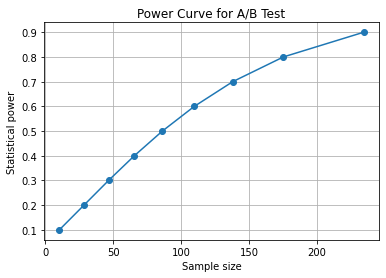

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

effect_size = 0.3  # Difference between the groups (Cohen's d)
alpha = 0.05       # Significance level (Type I error rate)
power_range = np.arange(0.1, 1, 0.1)  # Statistical power range

sample_sizes = [
    TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
    for power in power_range
]

plt.plot(sample_sizes, power_range, marker='o')
plt.xlabel('Sample size')
plt.ylabel('Statistical power')
plt.title('Power Curve for A/B Test')
plt.grid()
plt.show()



This power curve shows the relationship between sample size and statistical power for the given effect size and significance level. Using this curve, you can determine the appropriate sample size for your A/B test based on the desired level of statistical power.

# Analyzing and interpreting results: statistical significance and practical significance
After running an A/B test, you'll need to analyze the results to determine if there's a statistically significant difference between the groups. Statistical significance indicates that the observed differences are unlikely to have occurred by chance alone. However, it's also important to consider practical significance, which refers to whether the observed difference is large enough to be meaningful in a real-world context.

To analyze the results, you'll typically perform a hypothesis test, such as a t-test or chi-squared test, depending on the type of data you're working with. You'll then compare the resulting p-value to your chosen significance level (usually 0.05) to determine if the difference is statistically significant.

# Implementation of A/B tests in Python (using pandas and scipy.stats)
Now that you understand the importance of A/B testing, random assignment, sample size, and power analysis, let's implement an A/B test in Python using the pandas and scipy.stats libraries.

Step 1: Generate example data
First, let's create some example data for an A/B test. We'll generate data for new user activations and purchases for two groups: version A and version B.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_users = 1000

# Generate user data for version A and version B
data = {
    'user_id': np.arange(n_users),
    'version': np.where(np.random.rand(n_users) < 0.5, 'A', 'B'),
    'new_user_activation': np.random.rand(n_users) < 0.6,
    'purchases': np.random.poisson(1, n_users)
}

# Create a pandas DataFrame
df = pd.DataFrame(data)


Step 2: Calculate the key metrics for each group
Now, let's calculate the new user activation rate and average purchases for each group.

In [ ]:
grouped = df.groupby('version').agg(
    new_user_activation_rate=('new_user_activation', 'mean'),
    average_purchases=('purchases', 'mean')
)

print(grouped)


Step 3: Perform a statistical test to compare the groups
To determine if there's a statistically significant difference in new user activations and purchases between the two groups, we can perform a two-sample t-test (for new user activations) and a Mann-Whitney U test (for purchases, since they are not normally distributed).

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# New user activations
activations_A = df.loc[df['version'] == 'A', 'new_user_activation']
activations_B = df.loc[df['version'] == 'B', 'new_user_activation']

t_stat_activations, p_value_activations = ttest_ind(activations_A, activations_B)

# Purchases
purchases_A = df.loc[df['version'] == 'A', 'purchases']
purchases_B = df.loc[df['version'] == 'B', 'purchases']

u_stat_purchases, p_value_purchases = mannwhitneyu(purchases_A, purchases_B)

# Print results
print("New user activations:")
print(f"  t-statistic: {t_stat_activations:.2f}, p-value: {p_value_activations:.5f}")

print("\nPurchases:")
print(f"  U-statistic: {u_stat_purchases:.2f}, p-value: {p_value_purchases:.5f}")


These results will indicate whether there are any statistically significant differences in new user activations and purchases between version A and version B.

# 2g. Interpreting the results and making recommendations
When analyzing the results of an A/B test, it's essential to consider both statistical significance and practical significance. Statistical significance indicates whether the observed differences between the groups are likely to be due to chance, while practical significance refers to whether the differences are large enough to be meaningful in a real-world context.

Based on the p-values from the statistical tests, you can determine if there are any statistically significant differences between the groups. If the differences are also practically significant, you can recommend implementing the feature that led to better performance. If the differences are not practically significant, you might consider running additional tests or exploring other features to optimize user activations and purchases.

# 3. Repeated Measures and Longitudinal Analysis
3a. Introduction to repeated measures and longitudinal analysis
In some cases, you might want to analyze how a feature impacts user behavior over time. Repeated measures and longitudinal analysis allow you to track the same users over time and observe how their behavior changes in response to different features or conditions. This approach can be particularly useful for understanding the long-term impact of a feature on user engagement, retention, and purchases.

# 3b. Analyzing data with repeated measures
When working with repeated measures data, it's important to account for the dependency between observations from the same user. One common approach for analyzing repeated measures data is the use of mixed-effects models or linear mixed models (LMMs). These models allow you to model both fixed effects (e.g., group differences) and random effects (e.g., individual differences) simultaneously.

Step 1: Generate example data for repeated measures
First, let's create some example data for a repeated measures analysis. We'll generate data for user purchases over a period of three months for two groups: version A and version B.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_users = 1000
n_months = 3

# Generate user data for version A and version B over three months
data = {
    'user_id': np.repeat(np.arange(n_users), n_months),
    'month': np.tile(np.arange(n_months), n_users),
    'version': np.repeat(np.where(np.random.rand(n_users) < 0.5, 'A', 'B'), n_months),
    'purchases': np.random.poisson(1, n_users * n_months)
}

# Create a pandas DataFrame
df = pd.DataFrame(data)


Step 2: Fit a linear mixed model to the data
Next, we'll fit a linear mixed model (LMM) to the data using the statsmodels library. The LMM will allow us to model the fixed effect of the app version and the random effect of individual users on purchases over time.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the linear mixed model
model = smf.mixedlm("purchases ~ version * month", df, groups=df['user_id'], re_formula="~month")
result = model.fit()

# Print the results
print(result.summary())


3c. Interpreting the results and making recommendations
When interpreting the results of a repeated measures analysis, you should focus on the fixed effects for the app version, time, and their interaction. The interaction term helps you understand how the effect of the app version on user behavior changes over time.

If the interaction term is statistically significant, it suggests that the effect of the app version on purchases varies over time. In this case, you might consider implementing the feature that leads to better long-term performance, even if it does not have an immediate impact.

If the interaction term is not significant, but the main effect of the app version is significant, it suggests that one version consistently performs better than the other. In this case, you can recommend implementing the better-performing version.

If neither the interaction nor the main effect of the app version is significant, you might consider running additional tests, exploring other features, or collecting more data to better understand the long-term impact of different features on user behavior.


# Repeated Measures: Tracking User Behavior Over Time

In this section, we will explore repeated measures designs, which involve tracking the same users over time to understand the impact of a feature or intervention. This approach can provide valuable insights into user behavior and the long-term effects of different features. We will focus on designing and analyzing repeated measures experiments for the same key metrics: new user activations and purchases by all users.

## Why use repeated measures and its advantages
Repeated measures designs involve collecting data from the same users at multiple time points. This type of experimental design is useful for understanding changes in user behavior over time and assessing the long-term impact of features or interventions. Advantages of repeated measures designs include:

Increased statistical power due to reduced within-subject variability
The ability to study the effects of time and interactions between time and treatment
Reduced sample size requirements compared to between-subject designs


## Identifying key metrics and measures of interest
As with A/B testing, it is important to identify the key metrics and measures of interest before designing a repeated measures experiment. In our case, we are primarily interested in new user activations and purchases by all users. However, other relevant measures may include user engagement, retention, and customer lifetime value.

## Dealing with missing data and attrition
One of the challenges with repeated measures designs is handling missing data and attrition, which occur when users drop out of the study or fail to provide data at certain time points. Common strategies for dealing with missing data include:

Listwise deletion: Exclude users with missing data from the analysis
Imputation: Fill in missing values based on other available information
Mixed-effects models: Account for missing data by estimating random effects for each user

## Analyzing and interpreting results: mixed-effects models, growth curve modeling
To analyze data from repeated measures designs, we can use mixed-effects models or growth curve modeling. These techniques account for the within-subject dependency and allow us to estimate the effects of time, treatment, and their interaction. Key considerations when interpreting the results include:

The significance of main effects (time, treatment) and interactions (time x treatment)
The size and direction of the effects
The variability in user responses to the treatment

## Implementation of repeated measures analysis in Python (using pandas and statsmodels)
To implement repeated measures analysis in Python, we can use the pandas library for data manipulation and the statsmodels library for mixed-effects models and growth curve modeling. The following code demonstrates how to prepare the data and run a mixed-effects model:



In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the data
data = pd.read_csv("repeated_measures_data.csv")

# Fit a mixed-effects model
model = smf.mixedlm("metric ~ time * treatment", data, groups=data["user_id"], re_formula="~time")
result = model.fit()

# Print the results
print(result.summary())


The output of this mixed-effects model provides insights into the relationships between the metric (dependent variable), time, treatment, and their interaction. Here's a breakdown of how to interpret the results:

Fixed effects: In the "Fixed Effects" section of the output, you will find the estimated coefficients for the main effects and interaction terms. The coefficients represent the estimated effect of each predictor on the dependent variable, holding all other predictors constant. For example, the time coefficient shows the estimated change in the metric for a one-unit increase in time, while the treatment coefficient shows the estimated difference in the metric between the treatment and control groups. The time:treatment interaction term represents the difference in the effect of time on the metric between the treatment and control groups.

Statistical significance: The p-values (labeled P>|z| in the output) indicate the statistical significance of the estimated coefficients. A p-value less than 0.05 (or your chosen significance level) suggests that the corresponding effect is statistically significant, meaning there is strong evidence of an association between the predictor and the dependent variable.

Random effects: The "Random Effects" section of the output shows the estimated variance components for the random intercepts and slopes (time effects) for each user. These estimates quantify the between-user variability in the metric and its change over time. The Group Var row corresponds to the variance of the random intercepts, while the Group x time RE row corresponds to the variance of the random slopes. The covariance between the random intercepts and slopes is reported in the Group x time row.

Model fit statistics: The output also includes several model fit statistics, such as the AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion). These criteria can be used to compare the fit of different models, with lower values indicating better-fitting models.

To interpret the results, focus on the estimated coefficients, their statistical significance, and the random effects estimates. These estimates provide insights into the relationships between the metric, time, treatment, and users, and can help you understand the impact of the treatment on the metric over time, accounting for the repeated measures and individual differences between users.

# Testing Features Without a True Control Group

In this section, we will explore situations where a true control group is not available or feasible, and how to design and analyze experiments in such cases. As a data scientist at an internet company, you might encounter situations where it's not possible to have a control group or to randomly assign users to treatment and control groups. In these cases, alternative experimental designs and statistical techniques can be employed to estimate the causal effects of features on user behavior.

## Situations where a control group is not available or feasible
There are several reasons why a control group might not be available or feasible in an experimental setting:

Ethical considerations: In some cases, it might be unethical to withhold a potentially beneficial treatment or intervention from a control group.
Practical limitations: There might be logistical, financial, or operational constraints that prevent the formation of a true control group.
Universal treatment: If a feature is rolled out to all users simultaneously, there might be no way to establish a control group.
In these situations, we must rely on alternative experimental designs and statistical techniques to estimate the causal effects of features on user behavior.

## Alternative experimental designs
When a true control group is not available or feasible, the following alternative experimental designs can be employed:

Quasi-experiments: In a quasi-experimental design, subjects are not randomly assigned to treatment and control groups, but the researcher attempts to control for potential confounding factors and biases in the analysis.
Interrupted time series: In an interrupted time series design, data is collected at multiple time points before and after an intervention, allowing the researcher to assess the immediate and long-term effects of the intervention while accounting for pre-existing trends.
Difference-in-differences: In a difference-in-differences design, the researcher compares the changes in outcomes between a treatment group and a comparison group (which serves as a proxy for the control group) before and after an intervention, estimating the causal effect by assuming that the two groups would have followed parallel trends in the absence of the treatment.

## Analyzing and interpreting results: causal inference and treatment effect estimation
In the absence of a true control group, the primary challenge is to establish counterfactuals, or what would have happened in the absence of the treatment. The following statistical techniques can be employed to estimate causal effects and treatment effects in these situations:

Propensity score matching: This technique involves estimating the probability of receiving the treatment based on observed characteristics and matching treated subjects with similar untreated subjects, thereby reducing selection bias and confounding.
Instrumental variables: An instrumental variable is a variable that is correlated with the treatment assignment but not with the outcome, allowing the researcher to isolate the causal effect of the treatment.
Regression discontinuity: In a regression discontinuity design, the treatment is assigned based on a threshold or cutoff value of an observed variable, and the causal effect is estimated by comparing the outcomes just above and below the threshold.


## Implementation of quasi-experimental designs in Python
To implement quasi-experimental designs in Python, you can use the pandas library for data manipulation and the causalimpact library for causal inference analysis. The causalimpact library implements Bayesian structural time series models to estimate the causal effect of an intervention in an interrupted time series design.

The following code demonstrates how to use the causalimpact library to analyze an interrupted time series dataset:

                                 Average        Cumulative
Actual                                 2               100
Predicted                              0                42
95% CI                            [0, 2]        [-29, 114]
                                                          
Absolute Effect                        1                58
95% CI                            [2, 0]        [130, -13]
                                                          
Relative Effect                   138.9%            138.9%
95% CI                  [309.8%, -31.9%]  [309.8%, -31.9%]
                                                          
P-value                            12.6%                  
Prob. of Causal Effect             87.4%                  
None


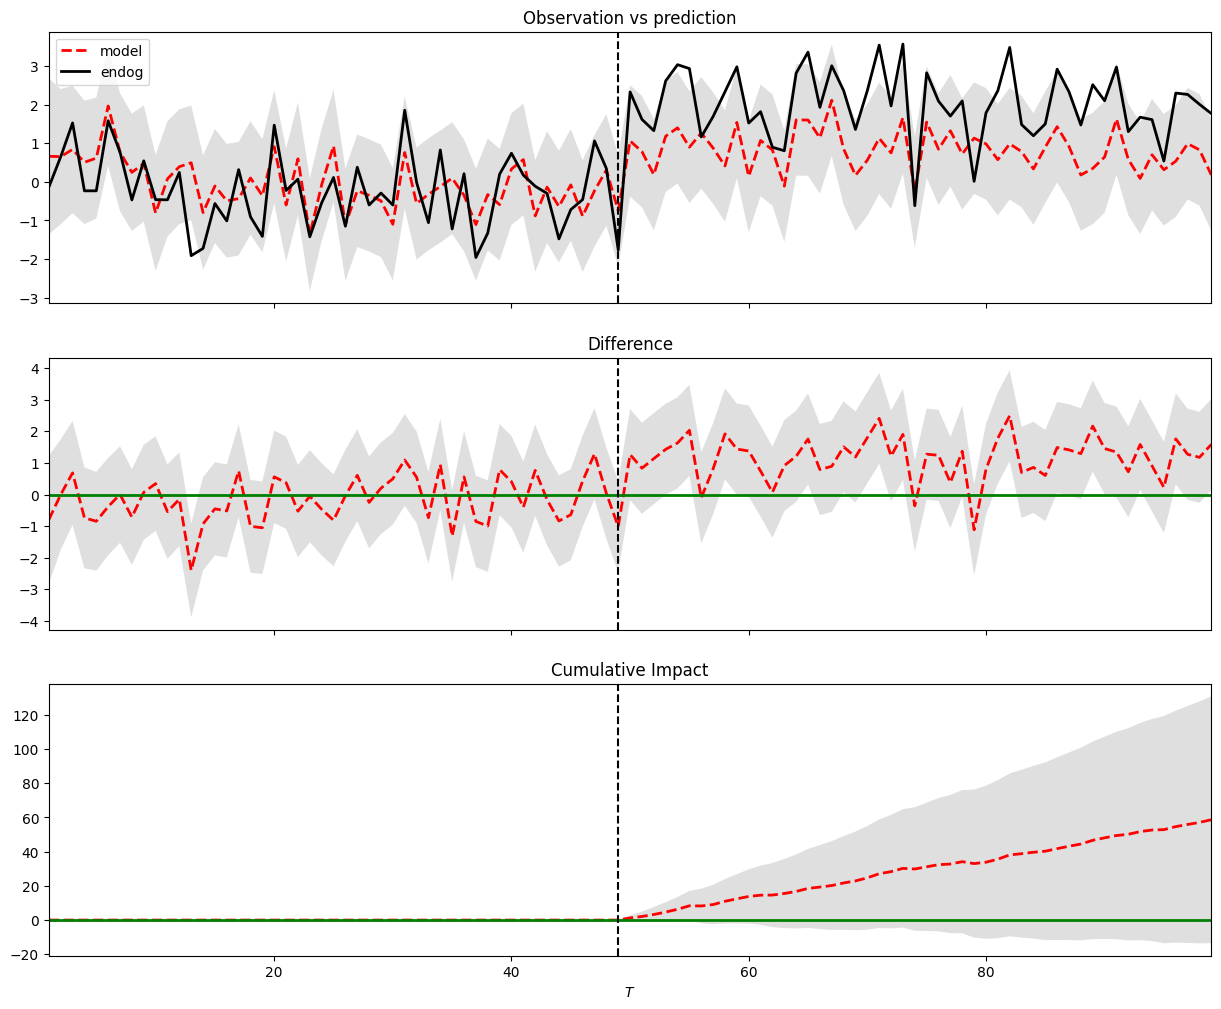

In [13]:
import pandas as pd
import numpy as np
# !pip install causalimpact
from causalimpact import CausalImpact

# Simulate data for an interrupted time series
np.random.seed(42)
pre_period = [0, 49]
post_period = [50, n-1]
time = np.arange(n)
treatment_effect = 2
data = pd.DataFrame({'time': time, 'y': np.random.normal(size=n)})
data.loc[post_period[0]:, 'y'] += treatment_effect

# Create a covariate (e.g., a marketing campaign) that is correlated with the treatment
data['x'] = data['y'] + np.random.normal(size=n)

# Apply the CausalImpact package to estimate the causal effect
impact = CausalImpact(data, pre_period, post_period)
impact.run()
print(impact.summary())

# Plot the results
impact.plot()

# Enhancing Experimental Design: Advanced Techniques

In this section, we will explore advanced techniques that can be used to enhance experimental design and improve the efficiency and accuracy of your experiments.

a. Factorial designs for testing multiple factors simultaneously

Factorial designs allow you to test multiple factors at once by creating multiple treatment groups that represent all possible combinations of the factors. This approach can save resources and time compared to running separate experiments for each factor.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate a 2x2 factorial experiment
np.random.seed(42)
n = 100
factor_A = np.random.choice([0, 1], n)
factor_B = np.random.choice([0, 1], n)
response = 1 + 0.5 * factor_A + 0.7 * factor_B + np.random.normal(size=n)

# Create a DataFrame with the results
data = pd.DataFrame({"Factor_A": factor_A, "Factor_B": factor_B, "Response": response})


b. Blocking and stratification to reduce variability

Blocking and stratification are techniques used to control for extraneous variables that may introduce variability and confound your results. Blocking involves grouping subjects based on a characteristic and running the experiment within each group, while stratification involves ensuring that treatment groups are balanced with respect to the characteristic.

In [16]:
# Simulate a blocked experiment
np.random.seed(42)
block_var = np.random.choice(["A", "B"], n)
blocked_data = data.copy()
blocked_data["Block"] = block_var
blocked_data

,time,y,x,Block
0,0,0.496714,-0.918657,A
1,1,-0.138264,-0.558910,B
2,2,0.647689,0.304974,A
3,3,1.523030,0.720753,A
4,4,-0.234153,-0.395439,A
...,...,...,...,...
95,95,0.536485,0.921802,B
96,96,2.296120,1.412263,B
97,97,2.261055,2.414780,B
98,98,2.005113,2.063322,B


## Sequential testing and multi-armed bandit algorithms for adaptive experimentation

Sequential testing and multi-armed bandit algorithms are adaptive experimental designs that allow for early stopping and reallocation of resources during the experiment. These approaches can improve the efficiency of your experiments by directing resources to the most promising treatments.

In [ ]:
# Simulate a multi-armed bandit experiment (using epsilon-greedy algorithm)
from contextlib2 import ExitStack
from scipy.stats import bernoulli

def epsilon_greedy_bandit(epsilon, arms, rewards):
    n_arms = len(arms)
    counts = np.zeros(n_arms)
    values = np.zeros(n_arms)

    with ExitStack() as stack:
        for t in range(len(rewards)):
            if np.random.random() < epsilon:
                a = np.random.randint(n_arms)
            else:
                a = np.argmax(values)
            r = rewards[t, a]
            counts[a] += 1
            values[a] += (r - values[a]) / counts[a]
            stack.enter_context(plt.style.context("seaborn-whitegrid"))
            plt.plot(values)
            plt.ylabel("Value")
            plt.xlabel("Time")
            plt.legend(arms, loc="best")
            plt.title("Multi-armed Bandit Experiment")
            plt.show()

# Run the epsilon-greedy algorithm on a simulated dataset
arms = ["A", "B", "C"]
n_trials = 1000
epsilon = 0.1
true_probs = [0.9, 0.8, 0.7]
rewards = bernoulli.rvs(true_probs, size=(n_trials, len(arms)))
epsilon_greedy_bandit(epsilon, arms, rewards)


# Communicating Results and Recommendations

In this section, we will discuss the importance of effectively communicating your experimental results and recommendations to product managers and other stakeholders. Clear communication is essential for ensuring that your findings are understood and can inform data-driven decisions.

a. Creating clear, concise, and compelling reports

When presenting your results, focus on clarity, conciseness, and relevance. Start by summarizing your main findings and explaining their implications for the company. Use simple language and avoid jargon when possible. Organize your report into sections and use headings to make it easy to navigate.

b. Data visualization for effective communication

Data visualizations can help you communicate complex information more effectively. Choose the right type of chart or plot for your data and ensure that it is clear and easy to understand. Use color, labels, and annotations to highlight important features and trends.

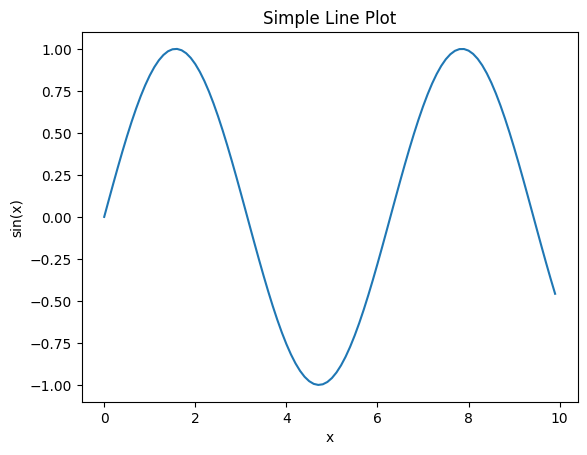

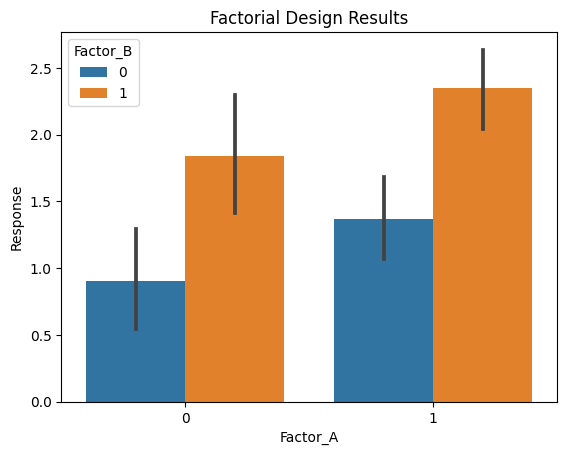

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a simple line plot
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.title("Simple Line Plot")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

# Convert Factor_A and Factor_B to categorical variables
# blocked_data["Factor_A"] = blocked_data["Factor_A"].astype("category")
# blocked_data["Factor_B"] = blocked_data["Factor_B"].astype("category")

# Create a bar plot using seaborn
sns.barplot(data=data, x="Factor_A", y="Response", hue="Factor_B")
plt.title("Factorial Design Results")
plt.show()



c. Presenting findings to product managers and other stakeholders

When presenting your findings, tailor your message to your audience. Focus on the most relevant information and use visuals to support your points. Be prepared to answer questions and provide additional information if needed. Practice your presentation to ensure a smooth delivery.

d. Implementation of data visualization in Python (using matplotlib, seaborn, and plotly)

There are several libraries available in Python for creating data visualizations, including matplotlib, seaborn, and plotly. Each library offers different features and styles, so choose the one that best fits your needs.

In [25]:
# Using plotly for interactive visualizations
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(data, x="Factor_A", y="Response", color="Factor_B", marginal_y="violin", trendline="ols")
fig.show()


## Summary and Conclusion

a. Recap of experimental design concepts for an internet company


In this course, we have covered the following experimental design concepts tailored for an internet company with a focus on new user activations and purchases:


Introduction to experimental design: We discussed the importance of experimental design in data science and its basic principles, including randomization, blocking, and replication.


Designing controlled experiments: We covered A/B testing, factorial designs, and Latin square designs, along with their implementation in Python using the statsmodels library.


Repeated measures: We explored tracking user behavior over time, dealing with missing data and attrition, and implementing mixed-effects models in Python with statsmodels.


Testing features without a true control group: We examined alternative experimental designs such as quasi-experiments, interrupted time series, and difference-in-differences, and implemented them in Python using the causalimpact library.


Enhancing experimental design: We learned about advanced techniques such as factorial designs, blocking and stratification, sequential testing, and multi-armed bandit algorithms, and implemented them using Python libraries like pandas, scipy.stats, and contextlib2.


Communicating results and recommendations: We discussed the importance of clear communication, effective data visualization, and presenting findings to stakeholders. We also demonstrated data visualization techniques in Python using matplotlib, seaborn, and plotly.



## Real-world applications and case studies

The experimental design concepts covered in this course have real-world applications in various industries, including technology, marketing, healthcare, and finance. Companies like Google, Facebook, and Amazon routinely use experimental designs to test new features, optimize user experience, and inform data-driven decision-making. By understanding and applying these concepts, you will be better equipped to contribute to your organization's success as a data scientist.

## Future directions and further resources

To further your knowledge of experimental design, consider exploring the following topics and resources:

Advanced statistical methods for experimental data analysis, such as Bayesian statistics, machine learning techniques, and causal inference methods.
Additional experimental designs and methodologies, such as response surface methodology, optimal designs, and adaptive designs.
Books and online courses on experimental design and data analysis, such as "Design and Analysis of Experiments" by Douglas C. Montgomery and Coursera's "Design of Experiments for Engineers and Scientists" course.
In conclusion, a strong foundation in experimental design is crucial for data scientists working in the dynamic and data-driven environment of an internet company. By mastering the concepts and techniques covered in this course, you will be well-prepared to design and analyze experiments, optimize features, and communicate your findings to inform decision-making at your organization.